In [ ]:
 from google.colab import drive
drive.mount('/content/drive')

## Preprocessing

### Importing Libraries

In [ ]:
!pip install pyngrok
!pip install flask-ngrok
!pip install flask==0.12.2  # for the app

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 681.2/681.2 kB 12.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyngrok: filename=pyngrok-6.0.0-py3-none-any.whl size=19879 sha256=ce52e844d223388df1df732a01243f2c7f29c9d8559a427cdd4ed452fd5245d0
  Stored in directory: /root/.cache/pip/wheels/5c/42/78/0c3d438d7f5730451a25f7ac6cbf4391759d22a67576ed7c2c
Successfully built pyngrok
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 6.8 MB/s eta 0:00:00
  Attempting uninstall: flask
    Found existing installation: Flask 2.2.4
    Uninstalling Flask-2.2.4:
      Successfully uninstalled Flask-2.2.4


In [ ]:
!pip install chart_studio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:

#importing all libraries
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.sequence import pad_sequences
import os
import re
import numpy as np
import pandas as pd
import chart_studio.plotly as py
import plotly.graph_objs as go
import itertools
from scipy import stats
from ast import literal_eval
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Embedding, LSTM, Input, Activation, GlobalAveragePooling1D, Flatten, Concatenate, Conv1D, MaxPooling1D,Bidirectional,TimeDistributed,Reshape,Conv2D,MaxPool2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import concatenate
from tensorflow.keras.optimizers import SGD, RMSprop, Adagrad, Adam
from tensorflow.keras.preprocessing.text import one_hot, text_to_word_sequence, Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import plot_model

import fnmatch

import warnings

import string
from pathlib import Path
from random import shuffle
from ast import literal_eval

warnings.filterwarnings('ignore')

In [ ]:
#!pip install nltk
import nltk


In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

from nltk.stem.wordnet import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
import gensim
import json


import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import plot_model
import tensorflow.keras.utils
from tensorflow.keras import utils as np_utils

#Keras Tokenizer just replaces certain punctuation characters and splits on the remaining space character.
#NLTK Tokenizer uses the Treebank tokenizer uses regular expressions to tokenize text as in Penn Treebank.

In [ ]:

WINDOWS_SIZE = 10
labels=['none','mild','moderate','moderately severe', 'severe']
num_classes = len(labels)

### Creating a dataframe from the transcript file

In [ ]:
def transcripts_to_dataframe(directory):
    rows_list = []

    filenames = os.listdir(directory)

    if ".DS_Store" in filenames:
        filenames.remove(".DS_Store")

    for filename in filenames:
        transcript_path = os.path.join(directory, filename)
        transcript = pd.read_csv(transcript_path, sep='\t')
        m = re.search("(\d{3})_TRANSCRIPT.csv", filename)
        if m:
            person_id = m.group(1)
            p = {}
            question = ""
            answer = ""
            lines = len(transcript)
            for i in range(0, lines):
                row = transcript.iloc[i]
                if (row["speaker"] == "Ellie") or (i == lines - 1):
                    p["personId"] = person_id
                    if "(" in str(question):
                        question = question[question.index("(") + 1:question.index(")")]
                    p["question"] = question
                    p["answer"] = answer
                    if question != "":
                        rows_list.append(p)
                    p = {}
                    answer = ""
                    question = row["value"]
                else:
                    answer = str(answer) + " " + str(row["value"])

    all_participants = pd.DataFrame(rows_list, columns=['personId', 'question', 'answer'])
    all_participants.to_csv(directory + 'all.csv', sep=',')
    print("File was created")
    return all_participants

In [ ]:
#loading the data
data_path = "/content/drive/My Drive/transcripts/data/"
all_participants = transcripts_to_dataframe(data_path)

File was created


In [ ]:
all_participants.head(20)

,personId,question,answer
0,303,hi i'm ellie thanks for coming in today i was ...,
1,303,how are you doing today,okay how 'bout yourself
2,303,i'm great thanks,
3,303,where are you from originally,here in california
4,303,really,yeah
5,303,what are some things you really like about l_a,oh well that it's big and broad there's a lot...
6,303,yeah,
7,303,what are some things you don't really like abo...,traffic um maybe the violence rate bad news e...
8,303,mhm,
9,303,what'd you study at school,sociology i have a um two year degree in libe...


### Removing the stopwords and cleaning the data

In [ ]:
#https://www.kaggle.com/currie32/the-importance-of-cleaning-text  the Importance of cleaning data !

def text_to_wordlist(text, remove_stopwords=True, stem_words=False):
    # Clean the text, with the option to remove stopwords and to stem words.

    # Convert words to lower case and split them
    text = text.lower().split()

    # Optionally, remove stop words
    if remove_stopwords:
        stops = stopwords.words("english")
        text = [wordnet_lemmatizer.lemmatize(w) for w in text if not w in stops ]
        text = [w for w in text if w != "nan" ]
    else:
        text = [wordnet_lemmatizer.lemmatize(w) for w in text]
        text = [w for w in text if w != "nan" ]

    text = " ".join(text)

    # Clean the text
    text = re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", " ", text)
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r",", " ", text)
    text = re.sub(r"\.", " ", text)
    text = re.sub(r"!", " ! ", text)
    text = re.sub(r"\/", " ", text)
    text = re.sub(r"\^", " ^ ", text)
    text = re.sub(r"\+", " + ", text)
    text = re.sub(r"\-", " - ", text)
    text = re.sub(r"\=", " = ", text)

    text = re.sub(r"\<", " ", text)
    text = re.sub(r"\>", " ", text)

    text = re.sub(r"'", " ", text)
    text = re.sub(r"(\d+)(k)", r"\g<1>000", text)
    text = re.sub(r":", " : ", text)
    text = re.sub(r" e g ", " eg ", text)
    text = re.sub(r" b g ", " bg ", text)
    text = re.sub(r" u s ", " american ", text)
    text = re.sub(r"\0s", "0", text)
    text = re.sub(r" 9 11 ", "911", text)
    text = re.sub(r"e - mail", "email", text)
    text = re.sub(r"j k", "jk", text)
    text = re.sub(r"\s{2,}", " ", text)

    # Optionally, shorten words to their stems
    if stem_words:
        text = text.split()
        stemmer = SnowballStemmer('english')
        stemmed_words = [stemmer.stem(word) for word in text]
        text = " ".join(stemmed_words)

    # Return a list of words
    return(text)

In [ ]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:

#creating a corpus with the words from the answers without stopwords given by the patients
all_participants_mix = all_participants.copy() # However, if you need the original list unchanged when the new list is modified, you can use copy() method. This is called shallow copy.
all_participants_mix['answer'] = all_participants_mix.apply(lambda row: text_to_wordlist(row.answer).split(), axis=1)

In [ ]:
##creating a corpus with the words from the answers withstopwords given by the patients
# stopwords are ={what is , have,}
all_participants_mix_stopwords = all_participants.copy()
all_participants_mix_stopwords['answer'] = all_participants_mix_stopwords.apply(lambda row: text_to_wordlist(row.answer, remove_stopwords=False).split(), axis=1)


In [ ]:
words = [w for w in all_participants_mix['answer'].tolist()]
words = set(itertools.chain(*words)) #chain('ABC', 'DEF') --> A B C D E F
vocab_size = len(words)

### Getting the top common words used by the patients

In [ ]:

words

{'anxi',
 'catalina',
 'god',
 'culture',
 'north',
 'nece',
 'scar',
 'bending',
 'noticed',
 'clearly',
 'mechanical',
 'lesbian',
 'curse',
 'corporate',
 'busybody',
 'caffeine',
 'bitterness',
 'picchu',
 'float',
 'environment',
 'cared',
 'cranky',
 'remark',
 'online',
 'exterior',
 'profound',
 'switched',
 'ha',
 'seal',
 'wore',
 'esperiences',
 'acquired',
 'boy',
 'persistence',
 'navy',
 'sorority',
 'indica',
 'subtitle',
 'wisconsin',
 'grove',
 'convincing',
 'niche',
 'et',
 'passionate',
 'app',
 'ke',
 'weighed',
 'waived',
 'passing',
 'medi',
 'formally',
 'killjoy',
 'musical',
 'med',
 'youngster',
 'perspective',
 'initial',
 'festival',
 'sensor',
 'investing',
 'extension',
 'smell',
 'leather',
 'tear',
 'blackjack',
 'suspended',
 'asl',
 'banged',
 'atmosphere',
 'repairing',
 'progressively',
 'apart',
 'interact',
 'listening',
 'socializing',
 'german',
 'film',
 'obligated',
 'bold',
 'sounded',
 'daring',
 'woke',
 'concern',
 'task',
 'chill',
 'awa'

In [ ]:
words_stop = [w for w in all_participants_mix_stopwords['answer'].tolist()]
words_stop = set(itertools.chain(*words_stop))
vocab_size_stop = len(words_stop)

In [ ]:
words_stop

{'anxi',
 'catalina',
 'god',
 'culture',
 'north',
 'nece',
 'scar',
 'bending',
 'noticed',
 'clearly',
 'mechanical',
 'lesbian',
 'curse',
 'corporate',
 'busybody',
 'caffeine',
 'bitterness',
 'picchu',
 'float',
 'environment',
 'cared',
 'cranky',
 'remark',
 'online',
 'exterior',
 'profound',
 'switched',
 'once',
 'ha',
 'seal',
 'wore',
 'esperiences',
 'acquired',
 'boy',
 'persistence',
 'navy',
 'sorority',
 'indica',
 'subtitle',
 'wisconsin',
 'grove',
 'convincing',
 'niche',
 'et',
 'passionate',
 'app',
 'ke',
 'weighed',
 'waived',
 'passing',
 'medi',
 'formally',
 'killjoy',
 'musical',
 'med',
 'youngster',
 'perspective',
 'initial',
 'festival',
 'sensor',
 'investing',
 'extension',
 'smell',
 'leather',
 'tear',
 'blackjack',
 'suspended',
 'asl',
 'banged',
 'atmosphere',
 'repairing',
 'progressively',
 'apart',
 'interact',
 'listening',
 'socializing',
 'german',
 'film',
 'obligated',
 'bold',
 'sounded',
 'daring',
 'woke',
 'concern',
 'task',
 'chill

In [ ]:
windows_size = WINDOWS_SIZE
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(all_participants_mix['answer']) # fit_on_texts creates the vocabulary index based on word frequency.
#The cat sat on the mat." It will create a dictionary s.t. word_index["the"] = 1; word_index["cat"] = 2 it is word -> index dictionary so every word gets a unique integer value. 0 is reserved for padding. So lower integer means more frequent word

tokenizer.fit_on_sequences(all_participants_mix['answer']) #texts_to_sequences Transforms each text in texts to a sequence of integers. So it basically takes each word in the text and replaces it with its corresponding integer value from the word_index dictionary.

all_participants_mix['t_answer'] = tokenizer.texts_to_sequences(all_participants_mix['answer'])
all_participants_mix.head(15)

#   why are the output as numbers when text_to_sequences is called?
# the Tokenizer stores everything in the word_index during fit_on_texts. Then, when calling the texts_to_sequences method, only the top num_words are considered.

,personId,question,answer,t_answer
0,303,hi i'm ellie thanks for coming in today i was ...,[],[]
1,303,how are you doing today,"[okay, bout]","[64, 1026]"
2,303,i'm great thanks,[],[]
3,303,where are you from originally,[california],[233]
4,303,really,[yeah],[11]
5,303,what are some things you really like about l_a,"[oh, well, big, broad, there, lot, lot, um, um...","[46, 15, 191, 4302, 57, 19, 19, 1, 1, 66, 334,..."
6,303,yeah,[],[]
7,303,what are some things you don't really like abo...,"[traffic, um, maybe, violence, rate, bad, news...","[197, 1, 65, 1787, 1634, 106, 1997, 78, 216, 4..."
8,303,mhm,[],[]
9,303,what'd you study at school,"[sociology, um, two, year, degree, liberal, ar...","[1494, 1, 75, 22, 338, 1198, 270, 429, 1494]"


In [ ]:
import pickle
with open('./tokenizer.pickle', 'wb') as f:
    pickle.dump(tokenizer, f)

In [ ]:

windows_size = WINDOWS_SIZE
tokenizer = Tokenizer(num_words=vocab_size_stop)
tokenizer.fit_on_texts(all_participants_mix_stopwords['answer'])
tokenizer.fit_on_sequences(all_participants_mix_stopwords['answer'])

all_participants_mix_stopwords['t_answer'] = tokenizer.texts_to_sequences(all_participants_mix_stopwords['answer'])
all_participants_mix_stopwords.head(15)

,personId,question,answer,t_answer
0,303,hi i'm ellie thanks for coming in today i was ...,[],[]
1,303,how are you doing today,"[okay, how, bout, yourself]","[120, 101, 1118, 423]"
2,303,i'm great thanks,[],[]
3,303,where are you from originally,"[here, in, california]","[113, 21, 319]"
4,303,really,[yeah],[32]
5,303,what are some things you really like about l_a,"[oh, well, that, it, big, and, broad, there, a...","[98, 41, 8, 6, 275, 2, 4386, 48, 3, 51, 4, 19,..."
6,303,yeah,[],[]
7,303,what are some things you don't really like abo...,"[traffic, um, maybe, the, violence, rate, bad,...","[282, 5, 122, 7, 1880, 1727, 173, 2089, 141, 3..."
8,303,mhm,[],[]
9,303,what'd you study at school,"[sociology, i, have, a, um, two, year, degree,...","[1589, 1, 17, 3, 5, 135, 61, 428, 21, 1292, 35..."


In [ ]:
word_index = tokenizer.word_index
word_size = len(word_index)
print(word_index["sad"])


648


# Data Augmentation of the tokenized words to improve model performance

In [ ]:
windows_size = WINDOWS_SIZE
cont = 0
word_index = tokenizer
phrases_lp = pd.DataFrame(columns=['personId','answer','t_answer'])
answers = all_participants_mix.groupby('personId').agg('sum')

for p in answers.iterrows():
    words = p[1]["answer"]
    size = len(words)
    word_tokens = p[1]["t_answer"]

    for i in range(size):
        sentence = words[i:min(i+windows_size,size)]
        tokens = word_tokens[i:min(i+windows_size,size)]
        phrases_lp.loc[cont] = [p[0], sentence, tokens]
        cont = cont + 1

In [ ]:

phrases_lp.head()
phrases_lp.to_csv('/content/drive/My Drive/transcripts/phrases_lp.csv', sep='\t')
print("File was created")

File was created


In [ ]:

phrases_lp["t_answer"] = pad_sequences(phrases_lp["t_answer"], value=0, padding="post", maxlen=windows_size).tolist()
phrases_lp.drop(phrases_lp[phrases_lp["t_answer"].map(len) > 10].index, inplace = True)


In [ ]:
#phrases_lp_stop.head()
#phrases_lp_stop.to_csv('/content/drive/My Drive/transcripts/phrases_lp_stop.csv', sep='\t')
#print("File was created")

### Loading the data augmented dataset

In [ ]:
phrases_lp = pd.read_csv('/content/drive/My Drive/transcripts/phrases_lp.csv', sep='\t', converters={"t_answer": literal_eval})
phrases_lp.head(25)


,Unnamed: 0,personId,answer,t_answer
0,0,300,"['good', 'atlanta', 'georgia', 'um', 'parent',...","[16, 1644, 2013, 1, 131, 1, 63, 5, 143, 5]"
1,1,300,"['atlanta', 'georgia', 'um', 'parent', 'um', '...","[1644, 2013, 1, 131, 1, 63, 5, 143, 5, 334]"
2,2,300,"['georgia', 'um', 'parent', 'um', 'love', 'lik...","[2013, 1, 131, 1, 63, 5, 143, 5, 334, 1]"
3,3,300,"['um', 'parent', 'um', 'love', 'like', 'weathe...","[1, 131, 1, 63, 5, 143, 5, 334, 1, 39]"
4,4,300,"['parent', 'um', 'love', 'like', 'weather', 'l...","[131, 1, 63, 5, 143, 5, 334, 1, 39, 1]"
5,5,300,"['um', 'love', 'like', 'weather', 'like', 'opp...","[1, 63, 5, 143, 5, 334, 1, 39, 1, 154]"
6,6,300,"['love', 'like', 'weather', 'like', 'opportuni...","[63, 5, 143, 5, 334, 1, 39, 1, 154, 529]"
7,7,300,"['like', 'weather', 'like', 'opportunity', 'um...","[5, 143, 5, 334, 1, 39, 1, 154, 529, 614]"
8,8,300,"['weather', 'like', 'opportunity', 'um', 'yes'...","[143, 5, 334, 1, 39, 1, 154, 529, 614, 100]"
9,9,300,"['like', 'opportunity', 'um', 'yes', 'um', 'to...","[5, 334, 1, 39, 1, 154, 529, 614, 100, 2014]"


### Loading the train, validation and test data containing the PHQ Scores

In [ ]:
from tensorflow.keras.utils import to_categorical
def load_avec_dataset_file(path,score_column):
    ds = pd.read_csv(path, sep=',')
    ds['level'] = pd.cut(ds[score_column], bins=[-1,0,5,10,15,25], labels=[0,1,2,3,4])  #cut function used to segregate array into bins 5 levels - 'none','mild','moderate','moderately severe', 'severe'
    ds['PHQ8_Score'] = ds[score_column]
    ds['cat_level'] = to_categorical(ds['level'], num_classes).tolist() #categorical levels
    ds = ds[['Participant_ID', 'level', 'cat_level', 'PHQ8_Score','Gender']]
    ds = ds.astype({"Participant_ID": float, "level": int, 'PHQ8_Score': int})
    return ds

In [ ]:
train = load_avec_dataset_file('/content/drive/My Drive/transcripts/train_split_Depression_AVEC2017.csv','PHQ8_Score')
dev = load_avec_dataset_file('/content/drive/My Drive/transcripts/dev_split_Depression_AVEC2017.csv','PHQ8_Score')
test = load_avec_dataset_file('/content/drive/My Drive/transcripts/full_test_split.csv','PHQ8_Score')
print("Size: train= {}, dev= {}, test={}".format(len(train), len(dev), len(test)))
train.head()


Size: train= 107, dev= 35, test=47


,Participant_ID,level,cat_level,PHQ8_Score,Gender
0,303.0,0,"[1.0, 0.0, 0.0, 0.0, 0.0]",0,0
1,304.0,2,"[0.0, 0.0, 1.0, 0.0, 0.0]",6,0
2,305.0,2,"[0.0, 0.0, 1.0, 0.0, 0.0]",7,1
3,310.0,1,"[0.0, 1.0, 0.0, 0.0, 0.0]",4,1
4,312.0,1,"[0.0, 1.0, 0.0, 0.0, 0.0]",2,1


In [ ]:
ds_total = pd.concat([dev,train,test])
total_phq8 = len(ds_total)
print("Total size = {}".format(total_phq8))

Total size = 189


In [ ]:

ds_total

,Participant_ID,level,cat_level,PHQ8_Score,Gender
0,302.0,1,"[0.0, 1.0, 0.0, 0.0, 0.0]",4,1
1,307.0,1,"[0.0, 1.0, 0.0, 0.0, 0.0]",4,0
2,331.0,2,"[0.0, 0.0, 1.0, 0.0, 0.0]",8,1
3,335.0,3,"[0.0, 0.0, 0.0, 1.0, 0.0]",12,0
4,346.0,4,"[0.0, 0.0, 0.0, 0.0, 1.0]",23,0
...,...,...,...,...,...
42,467.0,0,"[1.0, 0.0, 0.0, 0.0, 0.0]",0,1
43,469.0,1,"[0.0, 1.0, 0.0, 0.0, 0.0]",3,0
44,470.0,1,"[0.0, 1.0, 0.0, 0.0, 0.0]",3,0
45,480.0,1,"[0.0, 1.0, 0.0, 0.0, 0.0]",1,1


In [ ]:
ds_total.to_csv('/content/drive/My Drive/transcripts/ds_total.csv', sep='\t')
print("File was created")

File was created


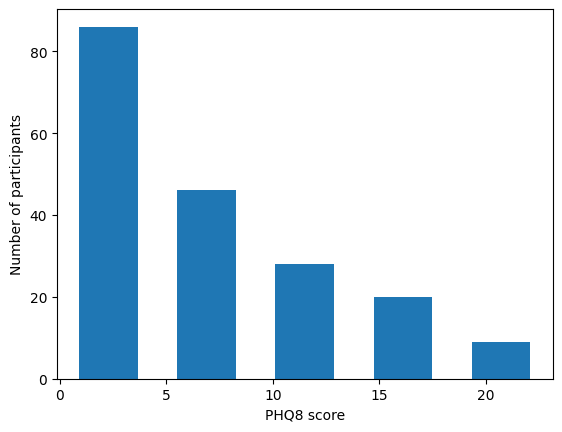

<Figure size 640x480 with 0 Axes>

In [ ]:
bins=[-1,0,5,10,15,25]
plt.figure()
plt.hist(ds_total["PHQ8_Score"], rwidth=0.6, bins=5)
plt.xlabel('PHQ8 score')
plt.ylabel('Number of participants')
plt.show()
plt.savefig('/content/drive/My Drive/transcripts/bins.png')


### Splitting the dataset and grouping them based on the 5 different level

In [ ]:
def split_by_phq_level(ds):
    none_ds = ds[ds['level']==0]
    mild_ds = ds[ds['level']==1]
    moderate_ds = ds[ds['level']==2]
    moderate_severe_ds = ds[ds['level']==3]
    severe_ds = ds[ds['level']==4]
    return (none_ds, mild_ds, moderate_ds, moderate_severe_ds, severe_ds)

In [ ]:
none_ds, mild_ds, moderate_ds, moderate_severe_ds, severe_ds = split_by_phq_level(ds_total)
print("Quantity per none_ds: {}, mild_ds: {}, moderate_ds {}, moderate_severe_ds: {}, severe_ds {}".format(len(none_ds), len(mild_ds), len(moderate_ds), len(moderate_severe_ds), len(severe_ds)))

Quantity per none_ds: 26, mild_ds: 70, moderate_ds 47, moderate_severe_ds: 24, severe_ds 22


In [ ]:
b_none_ds = ds_total[ds_total['level']==0]
b_mild_ds = ds_total[ds_total['level']==1].sample(26)
b_moderate_ds = ds_total[ds_total['level']==2].sample(26)
b_moderate_severe_ds = ds_total[ds_total['level']==3]
b_severe_ds = ds_total[ds_total['level']==4]

ds_total_b = pd.concat([b_none_ds, b_mild_ds, b_moderate_ds, b_moderate_severe_ds, b_severe_ds])

In [ ]:
ds_= ds_total_b.to_csv('ds_total_b.csv')

### Merging the phrases_lp (consisting of the transcripts) and ds_total consisting of PHQ Score

In [ ]:

ds_lp = pd.merge(ds_total, phrases_lp,left_on='Participant_ID', right_on='personId')
ds_lp.drop(ds_lp[ds_lp["t_answer"].map(len) < 10].index, inplace = True)
ds_lp_b = pd.merge(ds_total_b, phrases_lp,left_on='Participant_ID', right_on='personId')
ds_lp_b.drop(ds_lp_b[ds_lp_b["t_answer"].map(len) < 10].index, inplace = True)

In [ ]:
(len(ds_lp))

141137

### Splitting ds_total into train, dev and test in the ratio of 70:14:16

In [ ]:
def distribute_instances(ds, split_in = [70,14,16]):
    ds_shuffled = ds.sample(frac=1)
    none_ds, mild_ds, moderate_ds, moderate_severe_ds, severe_ds = split_by_phq_level(ds_shuffled)
    eq_ds = dict()
    prev_none = prev_mild = prev_moderate = prev_moderate_severe = prev_severe = 0
    split = split_in
    for p in split:
        last_none = min(len(none_ds), prev_none + round(len(none_ds) * p/100))
        last_mild = min(len(mild_ds), prev_mild + round(len(mild_ds) * p/100))
        last_moderate = min(len(moderate_ds), prev_moderate + round(len(moderate_ds) * p/100))
        last_moderate_severe = min(len(moderate_severe_ds), prev_moderate_severe + round(len(moderate_severe_ds) * p/100))
        last_severe = min(len(severe_ds), prev_severe + round(len(severe_ds) * p/100))
        eq_ds['d'+str(p)] = pd.concat([none_ds[prev_none: last_none], mild_ds[prev_mild: last_mild], moderate_ds[prev_moderate: last_moderate], moderate_severe_ds[prev_moderate_severe: last_moderate_severe], severe_ds[prev_severe: last_severe]])
        prev_none = last_none
        prev_mild = last_mild
        prev_moderate = last_moderate
        prev_moderate_severe = last_moderate_severe
        prev_severe = last_severe
    return (eq_ds['d70'], eq_ds['d14'], eq_ds['d16'])

In [ ]:

train_lp, dev_lp, test_lp = distribute_instances(ds_lp)
train_lp_b, dev_lp_b, test_lp_b = distribute_instances(ds_lp_b)

### Creating a confusion matrix which consists of the TPs, TNs, FPs and FNs of the predicted labels for the transcripts

In [ ]:
def confusion_matrix(model, x, y):
    prediction = model.predict(x, batch_size=None, verbose=0, steps=None)
    labels=['none','mild','moderate','moderately severe', 'severe']

    max_prediction = np.argmax(prediction, axis=1)

    max_actual = np.argmax(y, axis=1)

    y_pred = pd.Categorical.from_codes(max_prediction, labels)
    y_actu = pd.Categorical.from_codes(max_actual, labels)

    return pd.crosstab(y_actu, y_pred)

### Loading the Glove Embeddings into a file and putting each vector into an np array

In [ ]:
#embeddings_index = dict()
#f = open('/content/drive/My Drive/glove.6B.100d.txt', encoding="utf8")
#for line in f:
#    values = line.split()
#    word = values[0]
#   coefs = np.asarray(values[1:], dtype='float32')
#    embeddings_index[word] = coefs
#f.close()
!wget http://nlp.stanford.edu/data/glove.6B.zip


--2023-05-04 05:18:54--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2023-05-04 05:18:54--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2023-05-04 05:18:55--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip.1’

gl

In [ ]:
!unzip glove*.zip


Archive:  glove.6B.zip
replace glove.6B.50d.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
print('Indexing word vectors.')

embeddings_index = {}
f = open('glove.6B.100d.txt', encoding='utf-8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

### Creating a embedding matrix

In [ ]:

def fill_embedding_matrix(tokenizer):
    vocab_size = len(tokenizer.word_index) # tokenizer.word_index is the list that consist of all the unique words
    embedding_matrix = np.zeros((vocab_size+1, 100)) # creating an embedding matrix
    for word, i in tokenizer.word_index.items():
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector
    return embedding_matrix

### calling the embedding matrix function for creating vectors for each unique word

In [ ]:
embedding_matrix_lp = fill_embedding_matrix(tokenizer)
embedding_matrix_lp.shape

In [ ]:
train_lp['t_answer']
train_lp.head()

In [ ]:
train_a =np.stack(train_lp['t_answer'])
dev_a = np.stack(dev_lp['t_answer'])
train_y = np.stack(train_lp['cat_level'], axis=0)
dev_y = np.stack(dev_lp['cat_level'], axis=0)

In [ ]:
dev_a.shape

### stacking all the arrays together to form a single array

In [ ]:
train_a_b = np.stack(train_lp_b['t_answer'], axis=0)
dev_a_b = np.stack(dev_lp_b['t_answer'], axis=0)
train_y_b = np.stack(train_lp_b['cat_level'], axis=0)
dev_y_b = np.stack(dev_lp_b['cat_level'], axis=0)

In [ ]:

early_stopping = EarlyStopping(monitor='val_loss', patience=3)

### creating function for plotting the loss and accuracies of the models

In [ ]:
def plot_acc(history, title="Model Accuracy"):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(title)
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

def plot_loss(history, title="Model Loss"):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper right')
    plt.show()

def plot_compare_losses(history1, history2, name1="Red 1", name2="Red 2", title="Graph title"):
    plt.plot(history1.history['loss'], color="green")
    plt.plot(history1.history['val_loss'], 'r--', color="green")
    plt.plot(history2.history['loss'], color="blue")
    plt.plot(history2.history['val_loss'], 'r--', color="blue")
    plt.title(title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train ' + name1, 'Val ' + name1,
                'Train ' + name2, 'Val ' + name2],
               loc='upper right')
    plt.show()

def plot_compare_accs(history1, history2, name1="Red 1",
                      name2="Red 2", title="Graph title"):
    """Compara accuracies de dos entrenamientos con nombres name1 y name2"""
    plt.plot(history1.history['acc'], color="green")
    plt.plot(history1.history['val_acc'], 'r--', color="green")
    plt.plot(history2.history['acc'], color="blue")
    plt.plot(history2.history['val_acc'], 'r--', color="blue")
    plt.title(title)
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train ' + name1, 'Val ' + name1,
                'Train ' + name2, 'Val ' + name2],
               loc='lower right')
    plt.show()

def plot_compare_multiple_metrics(history_array, names, colors, title="Graph title", metric='acc'):
    legend = []
    for i in range(0, len(history_array)):
        plt.plot(history_array[i].history[metric], color=colors[i])
        plt.plot(history_array[i].history['val_' + metric], 'r--', color=colors[i])
        legend.append('Train ' + names[i])
        legend.append('Val ' + names[i])

    plt.title(title)
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.axis
    plt.legend(legend,
               loc='lower right')
    plt.show()

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

### answer_emb1 is the input consisting of the vectors having a window size of 10

In [ ]:
answer_inp = Input(shape=(windows_size, ))
embedding_size_glove = 100
answer_emb1 = Embedding(vocab_size_stop+1, embedding_size_glove, weights=[embedding_matrix_lp], input_length=windows_size, trainable=False)(answer_inp)



### GLoVE + LSTM MODEL

In [ ]:
bt = BatchNormalization()(answer_emb1)
lstm = LSTM(embedding_size_glove, return_sequences=True, dropout=0.2, recurrent_dropout=0.2)(bt)

dense1 = Dense(units=256, activation="relu")(lstm)
dense2 = Dense(units=256, activation="relu")(dense1)

flatten = Flatten()(dense2)

out = Dense(5,  activation='softmax')(flatten)

model = Model(inputs=[answer_inp], outputs=[out])
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 10)]              0         
                                                                 
 embedding (Embedding)       (None, 10, 100)           745000    
                                                                 
 batch_normalization (BatchN  (None, 10, 100)          400       
 ormalization)                                                   
                                                                 
 lstm (LSTM)                 (None, 10, 100)           80400     
                                                                 
 dense (Dense)               (None, 10, 256)           25856     
                                                                 
 dense_1 (Dense)             (None, 10, 256)           65792     
                                                             

In [ ]:
model_glove_lstm_hist = model.fit(train_a, train_y, validation_data=(dev_a, dev_y), epochs=30, batch_size=64, shuffle=True, callbacks=[early_stopping])

Epoch 1/30
1544/1544 [==============================] - 94s 58ms/step - loss: 1.4456 - accuracy: 0.3790 - val_loss: 1.3301 - val_accuracy: 0.4415
Epoch 2/30
1544/1544 [==============================] - 92s 60ms/step - loss: 1.2358 - accuracy: 0.4906 - val_loss: 1.0694 - val_accuracy: 0.5707
Epoch 3/30
1544/1544 [==============================] - 93s 60ms/step - loss: 1.0674 - accuracy: 0.5699 - val_loss: 0.8878 - val_accuracy: 0.6566
Epoch 4/30
1544/1544 [==============================] - 88s 57ms/step - loss: 0.9542 - accuracy: 0.6223 - val_loss: 0.7735 - val_accuracy: 0.7044
Epoch 5/30
1544/1544 [==============================] - 86s 55ms/step - loss: 0.8797 - accuracy: 0.6551 - val_loss: 0.7150 - val_accuracy: 0.7298
Epoch 6/30
1544/1544 [==============================] - 89s 58ms/step - loss: 0.8160 - accuracy: 0.6822 - val_loss: 0.6040 - val_accuracy: 0.7775
Epoch 7/30
1544/1544 [==============================] - 95s 61ms/step - loss: 0.7658 - accuracy: 0.7043 - val_loss: 0.5481 -

In [ ]:
#model.save('./model2',save_format='tf')
model.save('model_glove_lstm.h5')

In [ ]:
test_a = np.stack(test_lp['t_answer'], axis=0)
test_y = np.stack(test_lp['cat_level'], axis=0)
test_a_b = np.stack(test_lp_b['t_answer'], axis=0)
test_y_b = np.stack(test_lp_b['cat_level'], axis=0)

In [ ]:
test_a = np.stack(test_lp['t_answer'], axis=0)
test_y = np.stack(test_lp['cat_level'], axis=0)
test_a_b = np.stack(test_lp_b['t_answer'], axis=0)
test_y_b = np.stack(test_lp_b['cat_level'], axis=0)
df_confusion1 = confusion_matrix(model, test_a, test_y)

In [ ]:
df_confusion1

col_0,none,mild,moderate,moderately severe,severe
row_0,,,,,
none,3389,57,79,20,11
mild,93,7250,276,71,45
moderate,42,66,5950,17,17
moderately severe,21,51,71,2661,5
severe,25,40,72,19,2233


In [ ]:
score = model.evaluate(test_a, test_y, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.1510946899652481
Test accuracy: 0.9513750672340393


In [ ]:
"""
from sklearn.externals import joblib
joblib.dump(model,"model.pkl"),
"""

'\nfrom sklearn.externals import joblib\njoblib.dump(model,"model.pkl"),\n'

## **LSTM Model for the balanced dataset**

In [ ]:
model_glove_lstm_hist_b = model.fit(train_a_b, train_y_b, validation_data=(dev_a_b, dev_y_b), epochs=30, batch_size=64, shuffle=True, callbacks=[early_stopping])

Epoch 1/30
1030/1030 [==============================] - 62s 60ms/step - loss: 0.3676 - accuracy: 0.8653 - val_loss: 0.0602 - val_accuracy: 0.9856
Epoch 2/30
1030/1030 [==============================] - 57s 55ms/step - loss: 0.3206 - accuracy: 0.8835 - val_loss: 0.0565 - val_accuracy: 0.9851
Epoch 3/30
1030/1030 [==============================] - 57s 55ms/step - loss: 0.2927 - accuracy: 0.8941 - val_loss: 0.0553 - val_accuracy: 0.9864
Epoch 4/30
1030/1030 [==============================] - 57s 55ms/step - loss: 0.2725 - accuracy: 0.9021 - val_loss: 0.0488 - val_accuracy: 0.9885
Epoch 5/30
1030/1030 [==============================] - 57s 56ms/step - loss: 0.2600 - accuracy: 0.9071 - val_loss: 0.0451 - val_accuracy: 0.9889
Epoch 6/30
1030/1030 [==============================] - 58s 56ms/step - loss: 0.2540 - accuracy: 0.9084 - val_loss: 0.0467 - val_accuracy: 0.9881
Epoch 7/30
1030/1030 [==============================] - 68s 66ms/step - loss: 0.2446 - accuracy: 0.9128 - val_loss: 0.0508 -

In [ ]:
model.save('model_glove_lstm_b.h5')

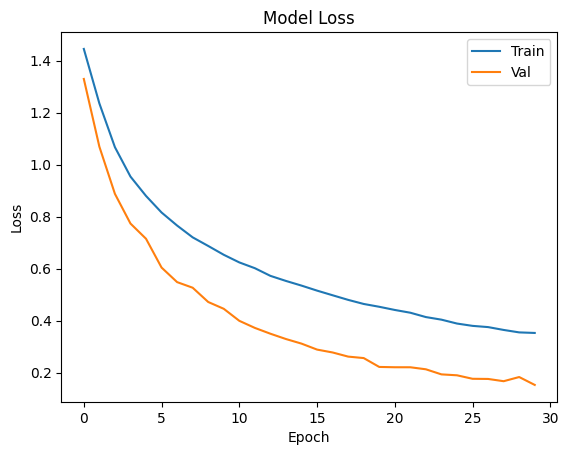

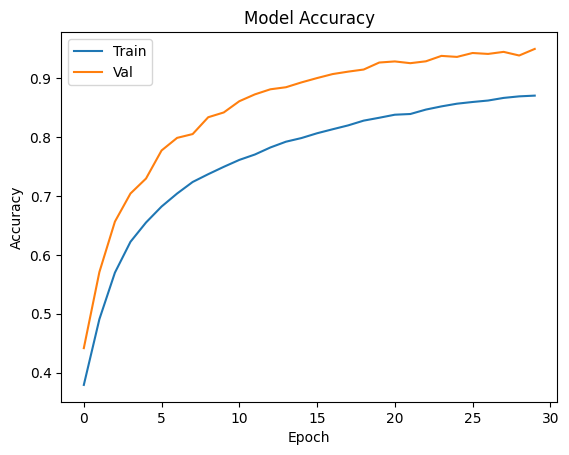

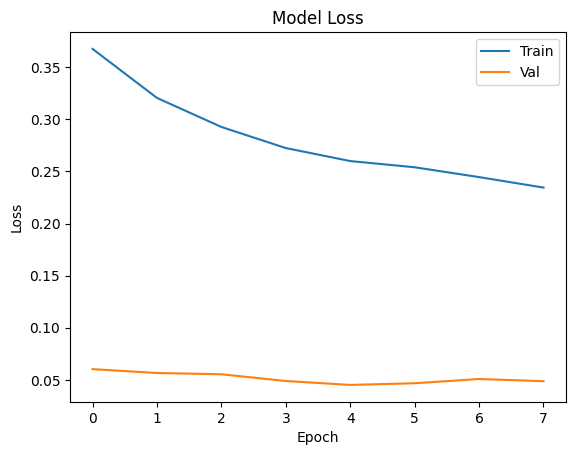

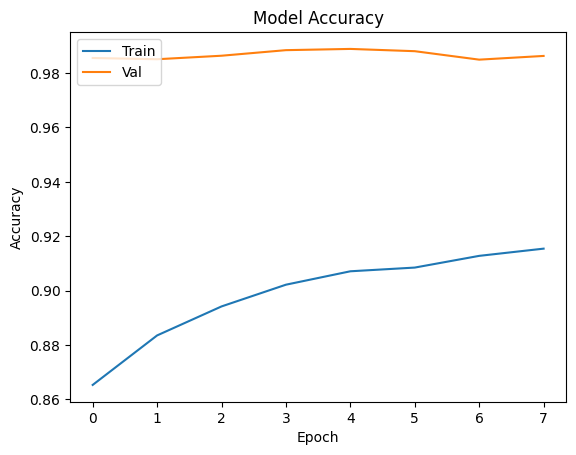

In [ ]:
plot_loss(model_glove_lstm_hist)
plot_acc(model_glove_lstm_hist)
plot_loss(model_glove_lstm_hist_b)
plot_acc(model_glove_lstm_hist_b)

In [ ]:
test_a = np.stack(test_lp['t_answer'], axis=0)
test_y = np.stack(test_lp['cat_level'], axis=0)
test_a_b = np.stack(test_lp_b['t_answer'], axis=0)
test_y_b = np.stack(test_lp_b['cat_level'], axis=0)
df_confusion = confusion_matrix(model, test_a_b, test_y_b)

In [ ]:
df_confusion

col_0,none,mild,moderate,moderately severe,severe
row_0,,,,,
none,3521,8,8,10,9
mild,21,2687,7,17,15
moderate,25,12,3481,19,19
moderately severe,9,1,3,2784,12
severe,9,2,2,8,2368


In [ ]:
score = model.evaluate(test_a_b, test_y_b, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.0487363338470459
Test accuracy: 0.9856545329093933


In [ ]:
#model.save('/content/drive/My Drive/transcripts/model_glove_lstm_b.h5')
#model.save('model_glove_lstm_b.h5')
with open('/content/drive/My Drive/transcripts/model_glove_lstm_b_hist.json', 'w') as f:
    json.dump(str(model_glove_lstm_b_hist.history), f)

NameError: ignored

In [ ]:
def test_model(text,model):
    print(text)
    word_list = text_to_wordlist(text)
    sequences = tokenizer.texts_to_sequences([word_list])
    sequences_input = list(itertools.chain(*sequences))
    sequences_input =  pad_sequences([sequences_input], value=0, padding="post", maxlen=windows_size).tolist()
    print(sequences_input)
    input_a = np.asarray(sequences_input)
    pred = model.predict(input_a, batch_size=None, verbose=0, steps=None)
    predicted_class = np.argmax(pred)
    print(labels[predicted_class])

In [ ]:
text= "I want an ice cream and have some fries for lunch"
test_model(text, model)
sen = "I'm afraid of losing my work, I don't have any money"
test_model(sen, model)
sen = "I'm worried about my future, I'm afraid of it"
test_model(sen, model)
sen = "I am a graduate student"
test_model(sen, model)
sen = "I am getting married"
test_model(sen, model)
sen = "This party is great, I know lots of people"
test_model(sen, model)
sen = "I miss my parents, brothers and sisters"
test_model(sen, model)
sen = "I detest my horrible job"
test_model(sen, model)
sen = "I cannot handle this anymore"
test_model(sen, model)

In [ ]:
sample=input("Enter your text  \n")
test_model(sample, model)

## MODEL 2  glove + 2LSTMs

In [ ]:
answer_inp = Input(shape=(windows_size, ))
embedding_size_glove = 100
answer_emb1 = Embedding(vocab_size_stop+1, embedding_size_glove, weights=[embedding_matrix_lp], input_length=windows_size, trainable=False)(answer_inp)


lstm1 = LSTM(embedding_size_glove, return_sequences=True, dropout=0.2, recurrent_dropout=0.2)(answer_emb1)
lstm2 = LSTM(embedding_size_glove, dropout=0.2, recurrent_dropout=0.2)(lstm1)

X = Dropout(0.2)(lstm2)
bt = BatchNormalization()(X)
dense1 = Dense(units=256, activation="relu")(bt)

out = Dense(5,  activation='softmax')(dense1)

model_2lstm = Model(inputs=[answer_inp], outputs=[out])
model_2lstm.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])
model_2lstm.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 10)]              0         
                                                                 
 embedding_1 (Embedding)     (None, 10, 100)           745000    
                                                                 
 lstm_1 (LSTM)               (None, 10, 100)           80400     
                                                                 
 lstm_2 (LSTM)               (None, 100)               80400     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 batch_normalization_1 (Batc  (None, 100)              400       
 hNormalization)                                                 
                                                           

In [ ]:
model_glove_2lstm_b_hist = model_2lstm.fit(train_a_b, train_y_b, validation_data=(dev_a_b, dev_y_b), epochs=30, batch_size=64, shuffle=True, callbacks=[early_stopping])

Epoch 1/30
1030/1030 [==============================] - 111s 99ms/step - loss: 1.6055 - accuracy: 0.2536 - val_loss: 1.5558 - val_accuracy: 0.2935
Epoch 2/30
1030/1030 [==============================] - 82s 79ms/step - loss: 1.5372 - accuracy: 0.3091 - val_loss: 1.5238 - val_accuracy: 0.3140
Epoch 3/30
1030/1030 [==============================] - 92s 89ms/step - loss: 1.4579 - accuracy: 0.3666 - val_loss: 1.3872 - val_accuracy: 0.4087
Epoch 4/30
1030/1030 [==============================] - 80s 78ms/step - loss: 1.3455 - accuracy: 0.4338 - val_loss: 1.2975 - val_accuracy: 0.4602
Epoch 5/30
1030/1030 [==============================] - 86s 84ms/step - loss: 1.2446 - accuracy: 0.4869 - val_loss: 1.2121 - val_accuracy: 0.4949
Epoch 6/30
1030/1030 [==============================] - 82s 80ms/step - loss: 1.1650 - accuracy: 0.5256 - val_loss: 1.0800 - val_accuracy: 0.5709
Epoch 7/30
1030/1030 [==============================] - 85s 82ms/step - loss: 1.1052 - accuracy: 0.5548 - val_loss: 0.9726 

In [ ]:
model_2lstm.save('model_2lstm_b.h5')

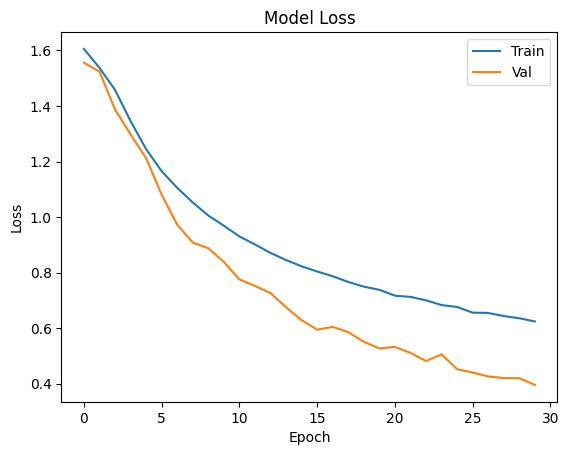

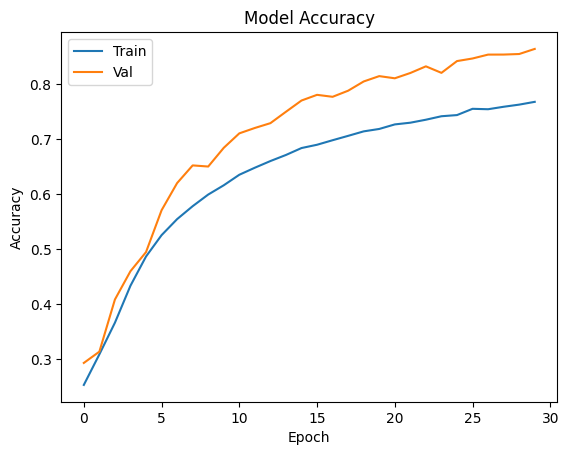

In [ ]:
plot_loss(model_glove_2lstm_b_hist)
plot_acc(model_glove_2lstm_b_hist)


In [ ]:

score = model_2lstm.evaluate(test_a_b, test_y_b, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.39083442091941833
Test accuracy: 0.8656438589096069


In [ ]:
df_confusion = confusion_matrix(model_2lstm, test_a_b, test_y_b)

In [ ]:
df_confusion

col_0,none,mild,moderate,moderately severe,severe
row_0,,,,,
none,3205,65,126,121,39
mild,161,2301,79,158,48
moderate,158,113,3019,200,66
moderately severe,83,53,78,2542,53
severe,126,75,112,109,1967


In [ ]:
model_2lstm.save('/content/drive/My Drive/transcripts/model_glove_2lstm_b.h5')
model_2lstm.save('model_glove_2lstm_b.h5')
#with open('/content/drive/My Drive/transcripts/model_glove_2lstm_b_hist.json', 'w') as f:
 #   json.dump(model_glove_2lstm_b_hist.history, f)

In [ ]:
sen = "All is going right with the party, I'm happy to know new people"
test_model(sen, model_2lstm)
sen = "I want an ice cream and have some fries for lunch"
test_model(sen, model_2lstm)
sen = "I'm afraid of losing my work, I don't have any money"
test_model(sen, model_2lstm)
sen = "I'm worried about my future, I'm afraid of it"
test_model(sen, model_2lstm)
sen = "My father does not love me"
test_model(sen, model_2lstm)

All is going right with the party, I'm happy to know new people
[[90, 100, 562, 1, 18, 128, 14, 136, 39, 0]]
moderately severe
I want an ice cream and have some fries for lunch
[[193, 2399, 2770, 6726, 4184, 0, 0, 0, 0, 0]]
none
I'm afraid of losing my work, I don't have any money
[[1, 18, 773, 900, 108, 211, 0, 0, 0, 0]]
moderate
I'm worried about my future, I'm afraid of it
[[1, 18, 1066, 566, 1, 18, 773, 0, 0, 0]]
mild
My father does not love me
[[342, 119, 0, 0, 0, 0, 0, 0, 0, 0]]
moderate


In [ ]:
Sample1=input('Enter your message : \n')
test_model(Sample1, model_2lstm)

Enter your message : 
# evaluate the model score = model.evaluate(test_a, test_y, verbose=0) print('Test loss:', score[0]) print('Test accuracy:', score[1])
# evaluate the model score = model.evaluate(test_a, test_y, verbose=0) print('Test loss:', score[0]) print('Test accuracy:', score[1])
[[987, 3, 987, 992, 6673, 987, 2321, 3639, 987, 3639]]
mild


## MODEL 3 Bidirectional LSTM

In [ ]:
# main model
answer_inp = Input(shape=(windows_size, ))
embedding_size_glove = 100
answer_emb1 = Embedding(vocab_size_stop+1, embedding_size_glove, weights=[embedding_matrix_lp], input_length=windows_size, trainable=False)(answer_inp)


bi_lstm =  Bidirectional (LSTM (embedding_size_glove,return_sequences=True,dropout=0.50),merge_mode='concat')(answer_emb1)
model_bi1 = TimeDistributed(Dense(embedding_size_glove,activation='relu'))(bi_lstm) #TimeDistributed method is used to apply a Dense layer to each of the time-steps independently. We used Dropout and l2_reg regularizers to reduce overfitting.
model_bi2 = Flatten()(model_bi1)
model_bi3 = Dense(256,activation='relu')(model_bi2)
output = Dense(5,activation='softmax')(model_bi3)
model_bi = Model(answer_inp,output)
model_bi.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])
model_bi.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 10)]              0         
                                                                 
 embedding_2 (Embedding)     (None, 10, 100)           745000    
                                                                 
 bidirectional (Bidirectiona  (None, 10, 200)          160800    
 l)                                                              
                                                                 
 time_distributed (TimeDistr  (None, 10, 100)          20100     
 ibuted)                                                         
                                                                 
 flatten_1 (Flatten)         (None, 1000)              0         
                                                                 
 dense_6 (Dense)             (None, 256)               2562

In [ ]:
model_glove_bilstm = model_bi.fit(train_a_b, train_y_b, validation_data=(dev_a_b, dev_y_b), epochs=30, batch_size=64, shuffle=True, callbacks=[early_stopping])

Epoch 1/30
1030/1030 [==============================] - 77s 68ms/step - loss: 1.5862 - accuracy: 0.2573 - val_loss: 1.5692 - val_accuracy: 0.2824
Epoch 2/30
1030/1030 [==============================] - 66s 64ms/step - loss: 1.5595 - accuracy: 0.2862 - val_loss: 1.5309 - val_accuracy: 0.3055
Epoch 3/30
1030/1030 [==============================] - 64s 62ms/step - loss: 1.5197 - accuracy: 0.3211 - val_loss: 1.4840 - val_accuracy: 0.3592
Epoch 4/30
1030/1030 [==============================] - 65s 63ms/step - loss: 1.4630 - accuracy: 0.3611 - val_loss: 1.4148 - val_accuracy: 0.3993
Epoch 5/30
1030/1030 [==============================] - 59s 57ms/step - loss: 1.3937 - accuracy: 0.4042 - val_loss: 1.2962 - val_accuracy: 0.4737
Epoch 6/30
1030/1030 [==============================] - 60s 58ms/step - loss: 1.3355 - accuracy: 0.4374 - val_loss: 1.2258 - val_accuracy: 0.5059
Epoch 7/30
1030/1030 [==============================] - 61s 59ms/step - loss: 1.2820 - accuracy: 0.4640 - val_loss: 1.1605 -

In [ ]:
# evaluate the model
score = model_bi.evaluate(test_a_b, test_y_b, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.7273743152618408
Test accuracy: 0.7208607196807861


In [ ]:
model_bi.save('model_bilstm_a_b.h5')

In [ ]:
model_bi.save('/content/drive/My Drive/transcripts/model_bilstm_a_b.h5')
model_bi.save('model_bilstm_a_b.h5')
#with open('/content/drive/My Drive/transcripts/model_glove_bilstm.json', 'w') as f:
 #   json.dump(model_glove_bilstm.history, f)

In [ ]:
#sample3=input("Enter your text  \n")
#test_model(sample3, model_bi)

Enter your text  
i am feeling a bit demotivated today as i cant seem to complete my project by deadline
i am feeling a bit demotivated today as i cant seem to complete my project by deadline
[[162, 149, 335, 449, 1356, 628, 4586, 0, 0, 0]]
none


**Model 4 Using BiGRU**

In [ ]:
from sklearn.metrics import roc_auc_score
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Embedding, SpatialDropout1D, concatenate
from tensorflow.keras.layers import GRU, Bidirectional, GlobalAveragePooling1D, GlobalMaxPooling1D
from tensorflow.keras.preprocessing import text, sequence
from tensorflow.keras.callbacks import Callback

###### AUC - ROC curve is a performance measurement for classification problem at various thresholds settings.

In [ ]:
class RocAucEvaluation(Callback):
    def __init__(self, validation_data=(), interval=1):
        super(Callback, self).__init__()

        self.interval = interval
        self.X_val, self.y_val = validation_data

    def on_epoch_end(self, epoch, logs={}):
        if epoch % self.interval == 0:
            y_pred = self.model.predict(self.X_val, verbose=0)
            score = roc_auc_score(self.y_val, y_pred)
            print("\n ROC-AUC - epoch: %d - score: %.6f \n" % (epoch+1, score))

In [ ]:
# main model
answer_inp = Input(shape=(windows_size, ))
embedding_size_glove = 100
answer_emb1 = Embedding(vocab_size_stop+1, embedding_size_glove, weights=[embedding_matrix_lp], input_length=windows_size, trainable=False)(answer_inp)

x = SpatialDropout1D(0.2)(answer_emb1)
x = Bidirectional(GRU(embedding_size_glove, return_sequences=True))(x)
avg_pool = GlobalAveragePooling1D()(x)
max_pool = GlobalMaxPooling1D()(x)
conc = concatenate([avg_pool, max_pool])
outp = Dense(5, activation="softmax")(conc)
model_gru = Model(inputs=answer_inp, outputs=outp)
model_gru.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model_gru.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 10)]         0           []                               
                                                                                                  
 embedding_3 (Embedding)        (None, 10, 100)      745000      ['input_4[0][0]']                
                                                                                                  
 spatial_dropout1d (SpatialDrop  (None, 10, 100)     0           ['embedding_3[0][0]']            
 out1D)                                                                                           
                                                                                                  
 bidirectional_1 (Bidirectional  (None, 10, 200)     121200      ['spatial_dropout1d[0][0]']

In [ ]:
batch_size = 64
epochs = 30
RocAuc = RocAucEvaluation(validation_data=(dev_a,dev_y), interval=1)

In [ ]:
hist = model_gru.fit(train_a, train_y, batch_size=batch_size, epochs=epochs, validation_data=(dev_a, dev_y),
                 callbacks=[RocAuc], verbose=2)

Epoch 1/30

 ROC-AUC - epoch: 1 - score: 0.678498 

1544/1544 - 83s - loss: 1.4773 - accuracy: 0.3618 - val_loss: 1.4175 - val_accuracy: 0.4071 - 83s/epoch - 54ms/step
Epoch 2/30

 ROC-AUC - epoch: 2 - score: 0.761511 

1544/1544 - 76s - loss: 1.3841 - accuracy: 0.4186 - val_loss: 1.2901 - val_accuracy: 0.4790 - 76s/epoch - 49ms/step
Epoch 3/30

 ROC-AUC - epoch: 3 - score: 0.821052 

1544/1544 - 71s - loss: 1.2629 - accuracy: 0.4850 - val_loss: 1.1685 - val_accuracy: 0.5337 - 71s/epoch - 46ms/step
Epoch 4/30

 ROC-AUC - epoch: 4 - score: 0.860330 

1544/1544 - 72s - loss: 1.1467 - accuracy: 0.5433 - val_loss: 1.0452 - val_accuracy: 0.6066 - 72s/epoch - 46ms/step
Epoch 5/30

 ROC-AUC - epoch: 5 - score: 0.888431 

1544/1544 - 72s - loss: 1.0555 - accuracy: 0.5858 - val_loss: 0.9251 - val_accuracy: 0.6574 - 72s/epoch - 46ms/step
Epoch 6/30

 ROC-AUC - epoch: 6 - score: 0.908275 

1544/1544 - 77s - loss: 0.9751 - accuracy: 0.6215 - val_loss: 0.8505 - val_accuracy: 0.6895 - 77s/epoch - 50

In [ ]:
model_gru.save('model_gru.h5')

In [ ]:
# evaluate the model
score = model_gru.evaluate(test_a_b, test_y_b, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.24504099786281586
Test accuracy: 0.9251511096954346


##CNN

In [ ]:
filter_sizes = [1,2,3,5]
num_filters = 36
answer_inp = Input(shape=(windows_size, ))
embedding_size_glove = 100
answer_emb1 = Embedding(vocab_size_stop+1, embedding_size_glove, weights=[embedding_matrix_lp], input_length=windows_size, trainable=False)(answer_inp)
x = Reshape((windows_size, embedding_size_glove, 1))(answer_emb1)
maxpool_pool = []
for i in range(len(filter_sizes)):
  conv = Conv2D(num_filters, kernel_size=(filter_sizes[i], embedding_size_glove),kernel_initializer='he_normal', activation='elu')(x)
  maxpool_pool.append(MaxPool2D(pool_size=(windows_size - filter_sizes[i] + 1, 1))(conv))

z = Concatenate(axis=1)(maxpool_pool)
z = Flatten()(z)
z = Dropout(0.1)(z)

outp = Dense(5, activation="softmax")(z)

model = Model(inputs=answer_inp, outputs=outp)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 10)]         0           []                               
                                                                                                  
 embedding_4 (Embedding)        (None, 10, 100)      745000      ['input_5[0][0]']                
                                                                                                  
 reshape (Reshape)              (None, 10, 100, 1)   0           ['embedding_4[0][0]']            
                                                                                                  
 conv2d (Conv2D)                (None, 10, 1, 36)    3636        ['reshape[0][0]']                
                                                                                            

In [ ]:
model_cnn =  model.fit(train_a, train_y, batch_size=64, epochs=30, validation_data=(dev_a, dev_y), verbose=2,callbacks=[early_stopping])

Epoch 1/30
1544/1544 - 25s - loss: 1.4577 - accuracy: 0.3798 - val_loss: 1.3298 - val_accuracy: 0.4523 - 25s/epoch - 16ms/step
Epoch 2/30
1544/1544 - 20s - loss: 1.2481 - accuracy: 0.4924 - val_loss: 1.1718 - val_accuracy: 0.5360 - 20s/epoch - 13ms/step
Epoch 3/30
1544/1544 - 22s - loss: 1.0843 - accuracy: 0.5707 - val_loss: 1.0802 - val_accuracy: 0.5745 - 22s/epoch - 14ms/step
Epoch 4/30
1544/1544 - 21s - loss: 0.9713 - accuracy: 0.6228 - val_loss: 0.9620 - val_accuracy: 0.6270 - 21s/epoch - 14ms/step
Epoch 5/30
1544/1544 - 22s - loss: 0.8933 - accuracy: 0.6548 - val_loss: 0.9228 - val_accuracy: 0.6436 - 22s/epoch - 14ms/step
Epoch 6/30
1544/1544 - 20s - loss: 0.8350 - accuracy: 0.6792 - val_loss: 0.8806 - val_accuracy: 0.6612 - 20s/epoch - 13ms/step
Epoch 7/30
1544/1544 - 23s - loss: 0.7927 - accuracy: 0.6953 - val_loss: 0.8412 - val_accuracy: 0.6774 - 23s/epoch - 15ms/step
Epoch 8/30
1544/1544 - 20s - loss: 0.7569 - accuracy: 0.7103 - val_loss: 0.8095 - val_accuracy: 0.6860 - 20s/ep

In [ ]:
model.save('model_cnn.h5')

In [ ]:
# evaluate the model
score = model.evaluate(test_a, test_y, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.5940144062042236
Test accuracy: 0.7781320810317993


##CNN + LSTM (Hybrid Model)

In [ ]:
lstm_cnn = Sequential()
lstm_cnn.add(Embedding(vocab_size_stop+1, 100,weights=[embedding_matrix_lp],input_length=windows_size, trainable=False))
lstm_cnn.add(Dropout(0.2))
lstm_cnn.add(Conv1D(64, 5, activation='relu'))
lstm_cnn.add(MaxPooling1D(pool_size=4))
lstm_cnn.add(LSTM(100))
lstm_cnn.add(Dense(5, activation='softmax'))
lstm_cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
## Fit train data
lstm_cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 10, 100)           745000    
                                                                 
 dropout_2 (Dropout)         (None, 10, 100)           0         
                                                                 
 conv1d (Conv1D)             (None, 6, 64)             32064     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 1, 64)            0         
 )                                                               
                                                                 
 lstm_4 (LSTM)               (None, 100)               66000     
                                                                 
 dense_10 (Dense)            (None, 5)                 505       
                                                        

In [ ]:
hist = lstm_cnn.fit(train_a_b, train_y_b, validation_data=(dev_a_b, dev_y_b), epochs=30, batch_size=64, shuffle=True, callbacks=[early_stopping])

Epoch 1/30
1030/1030 [==============================] - 14s 11ms/step - loss: 1.5792 - accuracy: 0.2682 - val_loss: 1.5489 - val_accuracy: 0.3050
Epoch 2/30
1030/1030 [==============================] - 12s 12ms/step - loss: 1.5248 - accuracy: 0.3183 - val_loss: 1.4990 - val_accuracy: 0.3383
Epoch 3/30
1030/1030 [==============================] - 11s 11ms/step - loss: 1.4603 - accuracy: 0.3629 - val_loss: 1.4469 - val_accuracy: 0.3733
Epoch 4/30
1030/1030 [==============================] - 10s 10ms/step - loss: 1.4083 - accuracy: 0.3937 - val_loss: 1.4170 - val_accuracy: 0.3907
Epoch 5/30
1030/1030 [==============================] - 15s 15ms/step - loss: 1.3716 - accuracy: 0.4146 - val_loss: 1.3829 - val_accuracy: 0.4068
Epoch 6/30
1030/1030 [==============================] - 14s 14ms/step - loss: 1.3462 - accuracy: 0.4304 - val_loss: 1.3631 - val_accuracy: 0.4220
Epoch 7/30
1030/1030 [==============================] - 11s 11ms/step - loss: 1.3213 - accuracy: 0.4442 - val_loss: 1.3388 -

In [ ]:
lstm_cnn.save('model_lstm_cnn.h5')

In [ ]:
# evaluate the model
score = lstm_cnn.evaluate(test_a_b, test_y_b, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.2074006795883179
Test accuracy: 0.5080693364143372


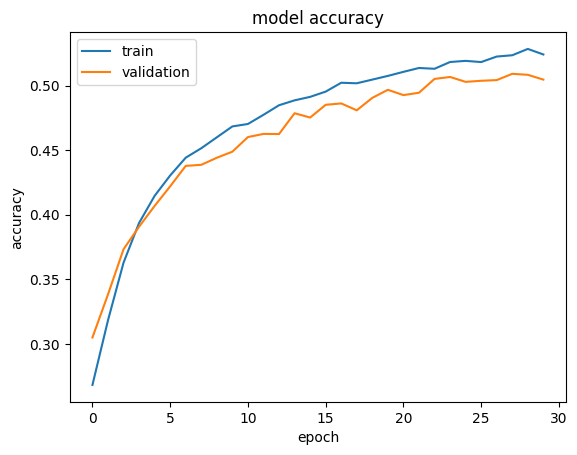

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## BiLSTM + Attention

In [ ]:
import tensorflow as tf
from keras import backend as K


lstm_units = 128
from tensorflow.keras.layers import RepeatVector,Permute,Multiply
in_text = Input(shape=(windows_size, ))
embedding_layer = Embedding(vocab_size_stop+1,
                        100,
                        weights=[embedding_matrix_lp],
                        input_length=windows_size,
                        trainable=False)
x = embedded_sequences = embedding_layer(in_text)
bilstm = Bidirectional(LSTM(lstm_units,return_sequences=True, dropout=0.3, recurrent_dropout=0.25))(x)
attention = TimeDistributed(Dense(1,activation='tanh'))(bilstm)
attention = Flatten()(attention)
attention = Activation('softmax')(attention)
attention = RepeatVector(2*lstm_units)(attention)
attention = Permute([2, 1])(attention)
sent_representation = Multiply()([bilstm,attention])
out_text = tf.keras.layers.Lambda(lambda xin: K.sum(xin, axis= 1), output_shape=(2*lstm_units,), name='sent')(sent_representation)

output_ = Dense(5, activation='softmax')(out_text)

bilstm_attn = Model(inputs=in_text, outputs= output_)
bilstm_attn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
bilstm_attn.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, 10)]         0           []                               
                                                                                                  
 embedding_9 (Embedding)        (None, 10, 100)      745000      ['input_9[0][0]']                
                                                                                                  
 bidirectional_5 (Bidirectional  (None, 10, 256)     234496      ['embedding_9[0][0]']            
 )                                                                                                
                                                                                                  
 time_distributed_4 (TimeDistri  (None, 10, 1)       257         ['bidirectional_5[0][0]']  

In [ ]:
history = bilstm_attn.fit(train_a_b, train_y_b, validation_data=(dev_a_b, dev_y_b), epochs=30, batch_size=64, shuffle=True)

Epoch 1/30
1030/1030 [==============================] - 95s 86ms/step - loss: 1.5697 - accuracy: 0.2781 - val_loss: 1.5382 - val_accuracy: 0.3180
Epoch 2/30
1030/1030 [==============================] - 92s 90ms/step - loss: 1.5092 - accuracy: 0.3313 - val_loss: 1.4455 - val_accuracy: 0.3794
Epoch 3/30
1030/1030 [==============================] - 89s 86ms/step - loss: 1.3919 - accuracy: 0.4097 - val_loss: 1.2875 - val_accuracy: 0.4714
Epoch 4/30
1030/1030 [==============================] - 92s 89ms/step - loss: 1.2522 - accuracy: 0.4887 - val_loss: 1.1401 - val_accuracy: 0.5472
Epoch 5/30
1030/1030 [==============================] - 87s 85ms/step - loss: 1.1287 - accuracy: 0.5484 - val_loss: 0.9849 - val_accuracy: 0.6278
Epoch 6/30
1030/1030 [==============================] - 87s 84ms/step - loss: 1.0293 - accuracy: 0.5991 - val_loss: 0.8859 - val_accuracy: 0.6681
Epoch 7/30
1030/1030 [==============================] - 87s 85ms/step - loss: 0.9515 - accuracy: 0.6322 - val_loss: 0.7822 -

In [ ]:
bilstm_attn.save('model_bilstm_attn.h5')

In [ ]:
# evaluate the model
score = bilstm_attn.evaluate(test_a, test_y, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.1320137977600098
Test accuracy: 0.7218015193939209


In [ ]:
#app.py is backend while home.html,predict.html are frontend

from flask import Flask,render_template,request

import itertools
import pickle
#from sklearn.metrics import roc_auc_score
from tensorflow.keras.models import Model,load_model
#from tensorflow.keras.preprocessing.sequence import pad_sequences
#from tensorflow.keras.layers import Input,LSTM,BatchNormalization,Flatten,Bidirectional,SpatialDropout1D,Dense
#from tensorflow.keras.layers import Embedding,GRU,GlobalAveragePooling1D,concatenate,GlobalMaxPooling1D
#from tensorflow.keras.callbacks import Callback,ModelCheckpoint,EarlyStopping
from tensorflow.keras.preprocessing.text import Tokenizer
import numpy as np
#import argparse
import regex as re
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
wordnet_lemmatizer = WordNetLemmatizer()
# we can call a web page using render template
#to initiaize flask class
import pandas as pd
app=Flask(__name__)

windows_size= 10
vocab_size_stop= 1579
embedding_size_glove=100
vocab_size= 1484

#embedding_matrix_lp=np.load('embedding_matr.npy')
def text_to_wordlist(text, remove_stopwords=True, stem_words=False):
    # Clean the text, with the option to remove stopwords and to stem words.

    # Convert words to lower case and split them
    text = text.lower().split()

    # Optionally, remove stop words
    if remove_stopwords:
        stops = stopwords.words("english")
        text = [wordnet_lemmatizer.lemmatize(w) for w in text if not w in stops ]
        text = [w for w in text if w != "nan" ]
    else:
        text = [wordnet_lemmatizer.lemmatize(w) for w in text]
        text = [w for w in text if w != "nan" ]

    text = " ".join(text)

    # Clean the text
    text = re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", " ", text)
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r",", " ", text)
    text = re.sub(r"\.", " ", text)
    text = re.sub(r"!", " ! ", text)
    text = re.sub(r"\/", " ", text)
    text = re.sub(r"\^", " ^ ", text)
    text = re.sub(r"\+", " + ", text)
    text = re.sub(r"\-", " - ", text)
    text = re.sub(r"\=", " = ", text)

    text = re.sub(r"\<", " ", text)
    text = re.sub(r"\>", " ", text)

    text = re.sub(r"'", " ", text)
    text = re.sub(r"(\d+)(k)", r"\g<1>000", text)
    text = re.sub(r":", " : ", text)
    text = re.sub(r" e g ", " eg ", text)
    text = re.sub(r" b g ", " bg ", text)
    text = re.sub(r" u s ", " american ", text)
    text = re.sub(r"\0s", "0", text)
    text = re.sub(r" 9 11 ", "911", text)
    text = re.sub(r"e - mail", "email", text)
    text = re.sub(r"j k", "jk", text)
    text = re.sub(r"\s{2,}", " ", text)

    # Optionally, shorten words to their stems
    if stem_words:
        text = text.split()
        stemmer = SnowballStemmer('english')
        stemmed_words = [stemmer.stem(word) for word in text]
        text = " ".join(stemmed_words)

    # Return a list of words
    return(text)

with open('tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

def app_test(sentence,h5file_paths):
    sentence_stop_removed= text_to_wordlist(sentence)
    answer= tokenizer.texts_to_sequences(sentence_stop_removed)
    answer = list(itertools.chain(*answer))
    answer =  pad_sequences([answer], value=0, padding="post", maxlen=windows_size).tolist()
    answer = np.asarray(answer)

    model1= load_model(h5file_paths[0])
    model2= load_model(h5file_paths[1])
    model3= load_model(h5file_paths[2])
    model4= load_model(h5file_paths[3])
    model5= load_model(h5file_paths[4])
    model6= load_model(h5file_paths[5])
    model7= load_model(h5file_paths[6])
    model8= load_model(h5file_paths[7])

    model_pred1= np.argmax(model1.predict(answer))
    model_pred2= np.argmax(model2.predict(answer))
    model_pred3= np.argmax(model3.predict(answer))
    model_pred4= np.argmax(model4.predict(answer))
    model_pred5= np.argmax(model5.predict(answer))
    model_pred6= np.argmax(model6.predict(answer))
    model_pred7= np.argmax(model7.predict(answer))
    model_pred8= np.argmax(model8.predict(answer))

    model_prediction= np.round_( (model_pred1+model_pred2+model_pred3+model_pred4+model_pred5+model_pred6+model_pred7+model_pred8)/(len(h5file_paths)))
    return model_prediction

In [ ]:
!pip install flask-ngrok


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install pyngrok
!pip install flask-ngrok
!pip install flask==0.12.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 4.8 MB/s eta 0:00:00
  Attempting uninstall: flask
    Found existing installation: Flask 2.2.4
    Uninstalling Flask-2.2.4:
      Successfully uninstalled Flask-2.2.4


In [ ]:
!ngrok authtoken 2KJXKTal6KOMC6UTNoe8N3IovQ8_7o8YK4pNDaZsox3FzDkde


Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [ ]:
!pip install pyngrok==4.1.1
!ngrok authtoken '2KJXKTal6KOMC6UTNoe8N3IovQ8_7o8YK4pNDaZsox3FzDkde'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for pyngrok: filename=pyngrok-4.1.1-py3-none-any.whl size=15979 sha256=254655831ce9cdc0d54b191e47314a0f43d91e867fe91a34811f4c6bc1a3b432
  Stored in directory: /root/.cache/pip/wheels/4c/7c/4c/632fba2ea8e88d8890102eb07bc922e1ca8fa14db5902c91a8
Successfully built pyngrok
  Attempting uninstall: pyngrok
    Found existing installation: pyngrok 6.0.0
    Uninstalling pyngrok-6.0.0:
      Successfully uninstalled pyngrok-6.0.0
Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [ ]:

from flask_ngrok import run_with_ngrok
from flask import *
!ngrok authtoken 2KJXKTal6KOMC6UTNoe8N3IovQ8_7o8YK4pNDaZsox3FzDkde

app = Flask(__name__)
run_with_ngrok(app)   #starts ngrok when the app is run
@app.route("/")
def home():
    return render_template("home.html")
    #return "<h1>Running Flask on Google Colab!</h1>"
@app.route("/predict", methods=['GET','POST'])
def predict():
    print("i was here 1")
    model_prediction= 2

    #model_prediction= random.choice([1,2,4])
    if request.method == "POST":

        #print(gru_load_model.input,gru_load_model.output)
        sentence = request.form.get("answer123")

        #file_list=['model_2lstm_b.h5','model_bilstm_a_b.h5','model_cnn.h5','model_glove_2lstm_b.h5','model_glove_lstm.h5','model_glove_lstm_b.h5','model_gru.h5','model_lstm_cnn.h5']
        file_list=['model_2lstm_b.h5','model_bilstm_a_b.h5','model_cnn.h5','model_glove_2lstm_b.h5','model_glove_lstm.h5','model_glove_lstm_b.h5','model_gru.h5','model_lstm_cnn.h5']
        model_prediction= app_test(sentence,file_list)


    return render_template('predict.html',prediction =model_prediction)



Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [ ]:
!pip uninstall pyngrok==4.1.1

Found existing installation: pyngrok 4.1.1
Uninstalling pyngrok-4.1.1:
  Would remove:
    /usr/local/bin/ngrok
    /usr/local/bin/pyngrok
    /usr/local/lib/python3.10/dist-packages/pyngrok-4.1.1.dist-info/*
    /usr/local/lib/python3.10/dist-packages/pyngrok/*
  Would not remove (might be manually added):
    /usr/local/lib/python3.10/dist-packages/pyngrok/bin/ngrok
Proceed (Y/n)? y
  Successfully uninstalled pyngrok-4.1.1


In [ ]:
run_with_ngrok(app)
app.run()

 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
Exception in thread Exception in thread Thread-46:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/urllib3/connection.py", line 174, in _new_conn
    conn = connection.create_connection(
  File "/usr/local/lib/python3.10/dist-packages/urllib3/util/connection.py", line 95, in create_connection
    raise err
  File "/usr/local/lib/python3.10/dist-packages/urllib3/util/connection.py", line 85, in create_connection
    sock.connect(sa)
ConnectionRefusedError: [Errno 111] Connection refused
Thread-47:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/urllib3/connection.py", line 174, in _new_conn
    conn = connection.create_connection(
  File "/usr/local/lib/python3.10/dist-packages/urllib3/util/connection.py", line 95, in